In [2]:
import pandas as pd
import csv
import gmaps
import matplotlib.pyplot as plt
from config import api_key

gmaps.configure(api_key=api_key)

In [3]:
file = "../Cleaned_NYC_Arrests.csv"
arrests_df = pd.read_csv(file)
arrests_df

,Row Labels,Count of OFNS_DESC
0,AGGRAVATED HARASSMENT 1,217
1,AGGRAVATED HARASSMENT 2,12902
2,"ASSAULT 2,1,PEACE OFFICER",3609
3,"ASSAULT 2,1,UNCLASSIFIED",39698
4,ASSAULT 3,89694
5,COURSE OF SEXUAL CONDUCT AGAINST A CHILD,211
6,"HARASSMENT,SUBD 1,CIVILIAN",145
7,"HOMICIDE, NEGLIGENT, VEHICLE,",14
8,"HOMICIDE, NEGLIGENT, VEHICLE, INTOX DRIVER",3
9,"MANSLAUGHTER,UNCLASSIFIED - NON NEGLIGENT",147


In [5]:
file_2 = "../october_2014.csv"
october_2014 = pd.read_csv(file_2)
october_2014

,ARREST_DATE,PD_DESC,OFNS_DESC,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,10/31/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE HISPANIC,40.731668,-73.989415
1,10/31/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24,M,WHITE HISPANIC,40.864328,-73.868406
2,10/31/2014,"MURDER,UNCLASSIFIED",MURDER & NON-NEGL. MANSLAUGHTER,25-44,F,BLACK,40.671111,-73.913563
3,10/31/2014,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,18-24,F,BLACK,40.648867,-73.950822
4,10/31/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,BLACK,40.717115,-73.920426
...,...,...,...,...,...,...,...,...
4491,10/1/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24,F,BLACK HISPANIC,40.816088,-73.895824
4492,10/1/2014,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,18-24,F,WHITE HISPANIC,40.691647,-73.865180
4493,10/1/2014,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,25-44,M,BLACK,40.836601,-73.889070
4494,10/1/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,45-64,M,WHITE HISPANIC,40.626282,-73.962547


In [6]:
locations = october_2014[["Latitude", "Longitude"]]

In [7]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, max_intensity=10, point_radius=10)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [20]:
arrests_df

,Unnamed: 0,ARREST_DATE,PD_DESC,OFNS_DESC,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,3,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE,40.763523,-73.987074
1,4,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,45-64,M,BLACK,40.759768,-73.989811
2,6,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24,F,WHITE HISPANIC,40.722199,-73.977122
3,8,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,BLACK HISPANIC,40.787496,-73.949752
4,10,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE HISPANIC,40.702840,-73.929467
...,...,...,...,...,...,...,...,...,...
158809,1048554,9/6/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE HISPANIC,40.748101,-73.879560
158810,1048562,9/6/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,45-64,M,BLACK,40.810877,-73.941064
158811,1048564,9/6/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24,M,WHITE HISPANIC,40.707936,-73.802907
158812,1048567,9/6/2014,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,65+,M,WHITE,40.740275,-73.848865


Text(0.5, 1.0, 'Most Violent Age Group')

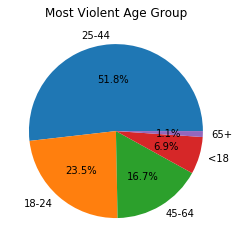

In [55]:
age = arrests_df["AGE_GROUP"]
age_groups = age.value_counts()
labels = ["25-44", "18-24", "45-64", "<18", "65+"]
plt.pie(age_groups, labels=labels, autopct="%1.1f%%")
plt.title("Most Violent Age Group")

Text(0.5, 1.0, 'Most Violent Gender')

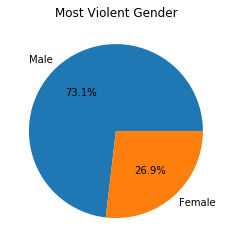

In [56]:
sex = arrests_df["PERP_SEX"]
sex_groups = sex.value_counts()
labels_2 = ["Male", "Female"]
plt.pie(sex_groups, labels=labels_2, autopct="%1.1f%%")
plt.title("Most Violent Gender")

Text(0.5, 1.0, 'Most Violent Race')

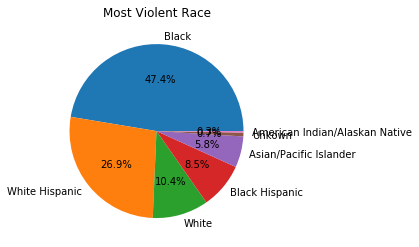

In [58]:
race = arrests_df["PERP_RACE"]
race_groups = race.value_counts()
labels_3 = ["Black", "White Hispanic", "White", "Black Hispanic", "Asian/Pacific Islander", "Unkown", "American Indian/Alaskan Native"]
plt.pie(race_groups, labels=labels_3, autopct="%1.1f%%")
plt.title("Most Violent Race")

In [65]:
age_sex = arrests_df[["AGE_GROUP", "PERP_SEX"]]
male_age = age_sex.loc[age_sex["PERP_SEX"] == "M",:]
female_age = age_sex.loc[age_sex["PERP_SEX"] == "F",:]
male_age = male_age["AGE_GROUP"]
female_age = female_age["AGE_GROUP"]

Text(0.5, 1.0, 'Most Violent Men')

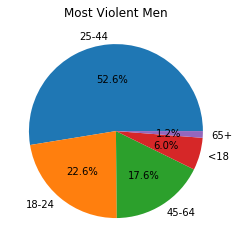

In [66]:
male_age = male_age.value_counts()
labels_4 = ["25-44", "18-24", "45-64", "<18", "65+"]
plt.pie(male_age, labels=labels_4, autopct="%1.1f%%")
plt.title("Most Violent Men by Age")

Text(0.5, 1.0, 'Most Violent Women')

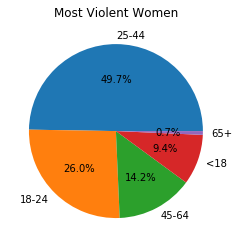

In [67]:
female_age = female_age.value_counts()
labels_5 = ["25-44", "18-24", "45-64", "<18", "65+"]
plt.pie(female_age, labels=labels_5, autopct="%1.1f%%")
plt.title("Most Violent Women by Age")

In [8]:
file_3 = "../Clean_La_Crime.csv"
la_df = pd.read_csv(file_3)
la_df_slimmed = la_df.head(4000)
la_df_slimmed

,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LAT,LON
0,2/20/2010,1350,13,Newton,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,NaN,Adult Arrest,33.9825,-118.2695
1,9/12/2010,45,14,Pacific,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,STREET,NaN,Invest Cont,33.9599,-118.3962
2,8/9/2010,1515,13,Newton,OTHER MISCELLANEOUS CRIME,0,M,H,ALLEY,NaN,Invest Cont,34.0224,-118.2524
3,1/5/2010,150,6,Hollywood,VIOLATION OF COURT ORDER,47,F,W,STREET,HAND GUN,Invest Cont,34.1016,-118.3295
4,1/2/2010,2100,1,Central,"RAPE, ATTEMPTED",47,F,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,7/23/2010,745,1,Central,BATTERY - SIMPLE ASSAULT,49,F,B,OTHER PREMISE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Arrest,34.0428,-118.2461
3996,7/23/2010,745,1,Central,BATTERY - SIMPLE ASSAULT,49,F,B,OTHER PREMISE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Arrest,34.0428,-118.2461
3997,7/23/2010,1140,1,Central,BATTERY WITH SEXUAL CONTACT,29,F,H,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,33.7735,-118.1481
3998,7/23/2010,1240,1,Central,OTHER MISCELLANEOUS CRIME,41,M,W,ALLEY,NaN,Invest Cont,34.0378,-118.2561


In [9]:
la_locations = la_df_slimmed[["LAT", "LON"]]

In [10]:
fig_2 = gmaps.figure()

heat_layer = gmaps.heatmap_layer(la_locations, max_intensity=10, point_radius=10)

fig_2.add_layer(heat_layer)

fig_2

Figure(layout=FigureLayout(height='420px'))

In [74]:
arrests_df

,Unnamed: 0,ARREST_DATE,PD_DESC,OFNS_DESC,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,3,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE,40.763523,-73.987074
1,4,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,45-64,M,BLACK,40.759768,-73.989811
2,6,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24,F,WHITE HISPANIC,40.722199,-73.977122
3,8,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,BLACK HISPANIC,40.787496,-73.949752
4,10,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE HISPANIC,40.702840,-73.929467
...,...,...,...,...,...,...,...,...,...
158809,1048554,9/6/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE HISPANIC,40.748101,-73.879560
158810,1048562,9/6/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,45-64,M,BLACK,40.810877,-73.941064
158811,1048564,9/6/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24,M,WHITE HISPANIC,40.707936,-73.802907
158812,1048567,9/6/2014,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,65+,M,WHITE,40.740275,-73.848865


In [76]:
print("Most Violent Day")
arrests_df.ARREST_DATE.mode()

Most Violent Day


0    11/12/2014
dtype: object

In [127]:
date_groups = arrests_df.groupby("ARREST_DATE")
crime_counts = date_groups.count()
crime_counts = crime_counts[["PD_DESC", "AGE_GROUP"]]
most_violent_day = crime_counts.loc[crime_counts["PD_DESC"] == 209,:]
least_violent_day = crime_counts.loc[crime_counts["PD_DESC"] == 50,:]
arrest_count_by_day = crime_counts.sort_values("PD_DESC", ascending=True)
arrest_count_by_day

,PD_DESC,AGE_GROUP
ARREST_DATE,,
9/6/2014,7,7
12/31/2014,50,50
12/24/2014,51,51
11/27/2014,53,53
11/23/2017,56,56
...,...,...
8/25/2016,195,195
1/1/2016,196,196
5/2/2017,199,199


In [110]:
average_arrests_per_day = crime_counts.mean()
average_arrests_per_day

PD_DESC      130.926628
AGE_GROUP    130.926628
dtype: float64

In [138]:
arrest_count_by_day["Date"] = arrest_count_by_day.index
aligned_dates = arrest_count_by_day.sort_values("Date", ascending=False)
arrest_count_by_day['Date'] = pd.to_datetime(arrest_count_by_day.Date)
arrest_count_by_day = arrest_count_by_day.sort_values(by="Date")
arrest_count_by_day

,PD_DESC,AGE_GROUP,Date
ARREST_DATE,,,
9/6/2014,7,7,2014-09-06
9/7/2014,152,152,2014-09-07
9/8/2014,149,149,2014-09-08
9/9/2014,144,144,2014-09-09
9/10/2014,140,140,2014-09-10
...,...,...,...
12/27/2017,105,105,2017-12-27
12/28/2017,116,116,2017-12-28
12/29/2017,101,101,2017-12-29


C:\Users\messi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


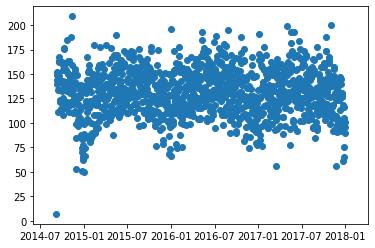

In [139]:
x_axis = arrest_count_by_day["Date"]
y_axis = arrest_count_by_day["PD_DESC"]
plt.scatter(x_axis, y_axis)
plt.show()

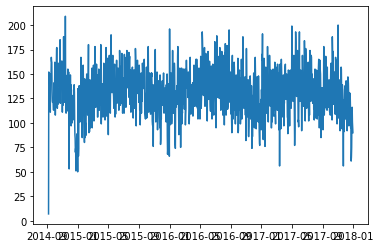

In [140]:
plt.plot(x_axis, y_axis)

In [141]:
arrests_df

,Unnamed: 0,ARREST_DATE,PD_DESC,OFNS_DESC,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,3,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE,40.763523,-73.987074
1,4,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,45-64,M,BLACK,40.759768,-73.989811
2,6,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24,F,WHITE HISPANIC,40.722199,-73.977122
3,8,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,BLACK HISPANIC,40.787496,-73.949752
4,10,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE HISPANIC,40.702840,-73.929467
...,...,...,...,...,...,...,...,...,...
158809,1048554,9/6/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE HISPANIC,40.748101,-73.879560
158810,1048562,9/6/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,45-64,M,BLACK,40.810877,-73.941064
158811,1048564,9/6/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24,M,WHITE HISPANIC,40.707936,-73.802907
158812,1048567,9/6/2014,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,65+,M,WHITE,40.740275,-73.848865


In [157]:
file_4 = "../arrests.csv"
og_file = pd.read_csv(file_4)
og_file

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0,25-44,M,BLACK,1063056,207463,40.735772,-73.715638
1,173114463,12/31/2017,478,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113,219613,40.769437,-73.910241
2,173113513,12/31/2017,849,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1,18-24,M,BLACK,1010719,186857,40.679525,-73.904572
3,173113423,12/31/2017,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0,25-44,M,WHITE,987831,217446,40.763523,-73.987074
4,173113421,12/31/2017,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0,45-64,M,BLACK,987073,216078,40.759768,-73.989811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,138570823,9/6/2014,461,UNAUTHORIZED USE VEHICLE 2,126.0,MISCELLANEOUS PENAL LAW,PL 1650800,F,K,75,0,18-24,M,BLACK,1016236,181084,40.663661,-73.884708
1048571,138570836,9/6/2014,849,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,M,24,0,65+,M,BLACK HISPANIC,994194,231714,40.802680,-73.964084
1048572,138568406,9/6/2014,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,100,0,45-64,F,BLACK,1032699,151400,40.582110,-73.825581
1048573,138568366,9/6/2014,339,"LARCENY,PETIT FROM OPEN AREAS,UNCLASSIFIED",341.0,PETIT LARCENY,PL 1552500,M,M,14,6,25-44,M,WHITE,986781,212761,40.750664,-73.990867


In [160]:
arrests_df = og_file.loc[
    (og_file["PD_DESC"] == "AGGRAVATED HARASSMENT 1") |
    (og_file["PD_DESC"] == "AGGRAVATED HARASSMENT 2") |
    (og_file["PD_DESC"] == "ASSAULT 2,1,PEACE OFFICER") |
    (og_file["PD_DESC"] == "ASSAULT 2,1,UNCLASSIFIED") |
    (og_file["PD_DESC"] == "ASSAULT 3") |
    (og_file["PD_DESC"] == "COURSE OF SEXUAL CONDUCT AGAINST A CHILD") |
    (og_file["PD_DESC"] == "HARASSMENT,SUBD 1,CIVILIAN") |
    (og_file["PD_DESC"] == "HOMICIDE, NEGLIGENT, VEHICLE,") |
    (og_file["PD_DESC"] == "HOMICIDE, NEGLIGENT, VEHICLE, INTOX DRIVER") |
    (og_file["PD_DESC"] == "MANSLAUGHTER,UNCLASSIFIED - NON NEGLIGENT") |
    (og_file["PD_DESC"] == "MURDER,UNCLASSIFIED") |
    (og_file["PD_DESC"] == "RAPE 1") |
    (og_file["PD_DESC"] == "RAPE 2") |
    (og_file["PD_DESC"] == "RAPE 3") |
    (og_file["PD_DESC"] == "SEXUAL ABUSE 1") |
    (og_file["PD_DESC"] == "STRANGULATION 1ST")
]